In [15]:
import cv2 as cv
import numpy as np

path = './data/doggo.png'

img_bgr = cv.imread(path, cv.IMREAD_COLOR)

img_gray_uncropped = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)



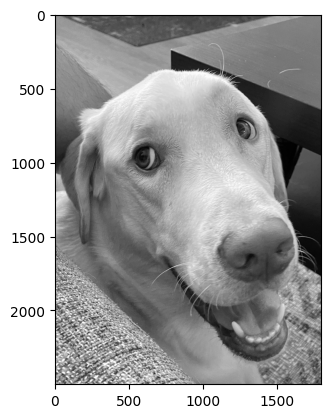

In [19]:
import matplotlib.pyplot as plt
img_gray = img_gray_uncropped[500:3000,300:2100]

plt.imshow(img_gray, cmap='gray')

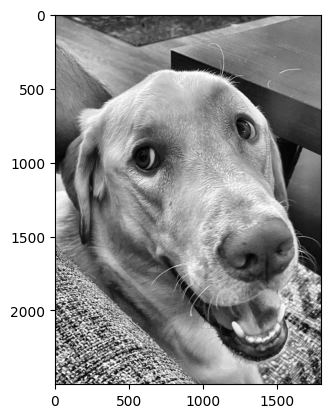

In [20]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized_img = clahe.apply(img_gray)
plt.imshow(equalized_img, cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


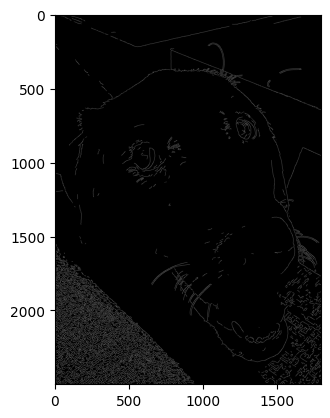

In [36]:
sigma = 3
ksize = int(6*sigma + 1)
if ksize %2 == 0:
  ksize+=1

blurred_image = cv.GaussianBlur(img_gray, (ksize, ksize), sigmaX=sigma, sigmaY=sigma)

low = 0.05*np.max(blurred_image)
high = 0.2*np.max(blurred_image)
edges = cv.Canny(blurred_image, threshold1=low, threshold2=high)

edges = edges.astype(bool) * 255

plt.imshow(edges, cmap='gray')
print(edges)

In [37]:
img_gray.shape

(2500, 1800)

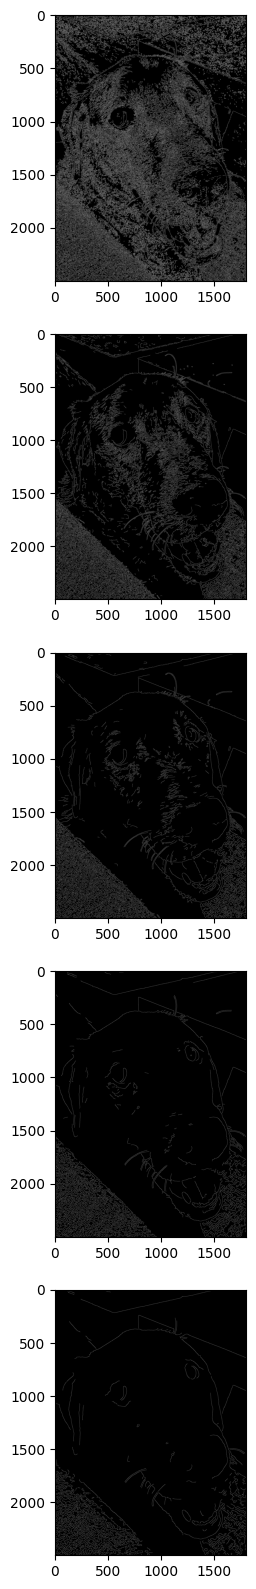

In [47]:
import skimage
equalized_img = skimage.exposure.equalize_adapthist(img_gray)

_, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
ax = ax.ravel()
for i, s in enumerate([1,2,3,4,5]):
  canny_edges = skimage.feature.canny(equalized_img, sigma=s)

  output = (canny_edges * 255).astype(np.uint8)

  ax[i].imshow(canny_edges, cmap='gray')
  cv.imwrite(f'./data/doggo-{i}.png', output)

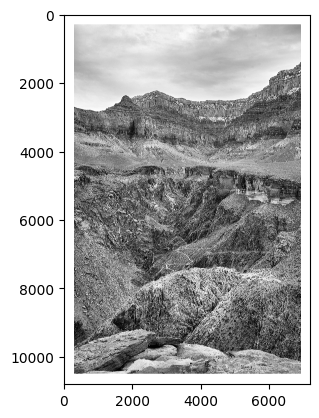

In [50]:
def equalized_img(path):
  img_bgr = cv.imread(path, cv.IMREAD_COLOR)

  img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)  

  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  equalized_img = clahe.apply(img_gray) 
  return equalized_img

img = equalized_img('./data/bordered-canyon.jpg')
plt.imshow(img, cmap='gray')

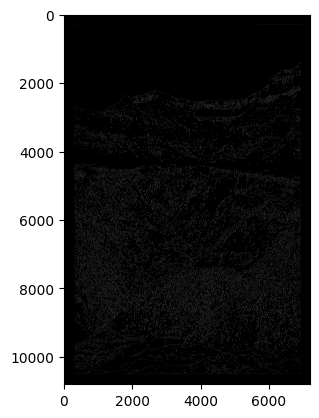

In [51]:
edges = skimage.feature.canny(img, sigma=5)
plt.imshow(edges, cmap='gray')

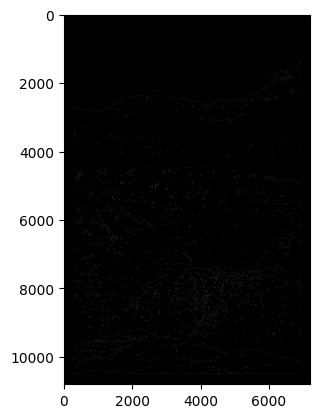

In [53]:
edges = skimage.feature.canny(img, sigma=7)
plt.imshow(edges, cmap='gray')